c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


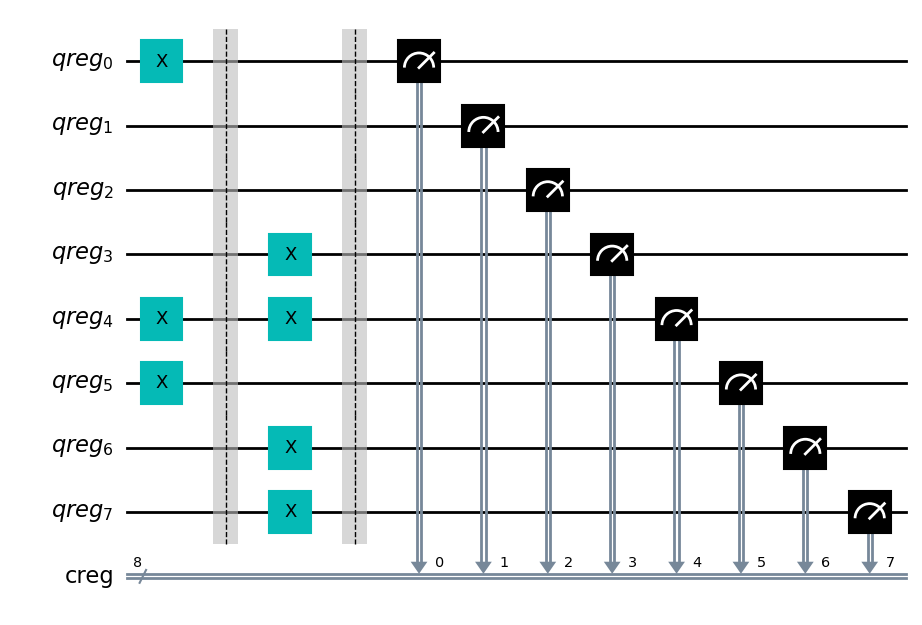

In [10]:
#In this project we will explore the quantum adaptation for the classical one time pad

#Importing dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

#Creating the circuit
q = QuantumRegister(8, "qreg")
c = ClassicalRegister(8, "creg")

qc = QuantumCircuit(q,c)

#Encoding the message

message = [1,0,0,0,1,1,0,0] #The message from Asja

for m in range(len(message)):
    if message[m]==1:
        qc.x(q[m])


#Creating a barrier for seperation
qc.barrier()

#Encrypting the message with a randomly generated key
key = []
for i in range(8):
    a = randrange(2)
    key.append(a)
    if a==1:
        qc.x(q[i])

#Seperating with a barrier
qc.barrier()
qc.measure(q,c)
qc.draw(output = 'mpl')

In [11]:
# execute the circuit
job = execute(qc,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(qc)

# display the measurement results with total count
print("Encryption", encryption)
# this converts the measurement result string into a list
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
encrypted_message.reverse()
print()
print("Message:", message)
print("Key:", key)
print()
print("Encrypted Message:", encrypted_message)

Encryption {'11101001': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Key: [0, 0, 0, 1, 1, 0, 1, 1]

Encrypted Message: [1, 0, 0, 1, 0, 1, 1, 1]


C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\2089909089.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'))


c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


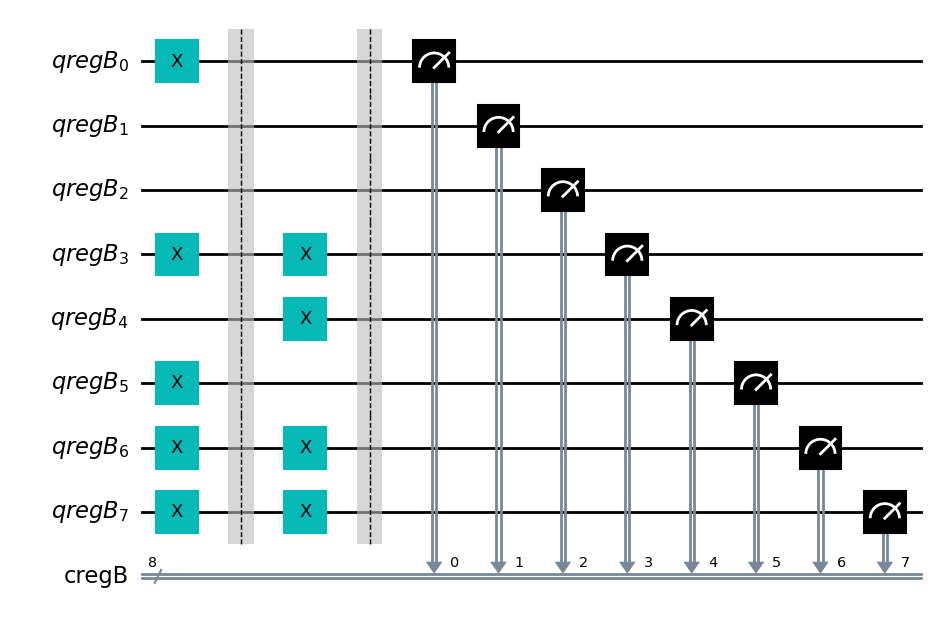

In [15]:
#Now let's create a quantum circuit to decrypt the message

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute_function

from random import randrange


#Now we have both the keys and the Encrypted message and we just have to
#use a decryption method to get the message


q2 = QuantumRegister(8, "qregB")
c2 = ClassicalRegister(8, "cregB")

qc2 = QuantumCircuit(q2,c2)

for m in range(len(encrypted_message)):
    if encrypted_message[m] == 1:
        qc2.x(q2[m])
qc2.barrier()
#Now we reconstructed encrypted message now we have to use the randomly generated key to decrypt the message
        
for i in range(len(key)):
    if key[i]==1:
        qc2.x(q2[i])


qc2.barrier()

#Doing the measurements
qc2.measure(q2,c2)
qc2.draw(output = 'mpl')


In [16]:
#Running the code and getting the results for the decrypted message at B
# execute the circuit
job = execute(qc2,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(qc2)

# display the measurement results with total count
print("Decryption", decryption)
# this converts the measurement result string into a list
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'00110001': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Decrypted Message: [1, 0, 0, 0, 1, 1, 0, 0]

Protocol is correct!


C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\2614727336.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc2,Aer.get_backend('qasm_simulator'))


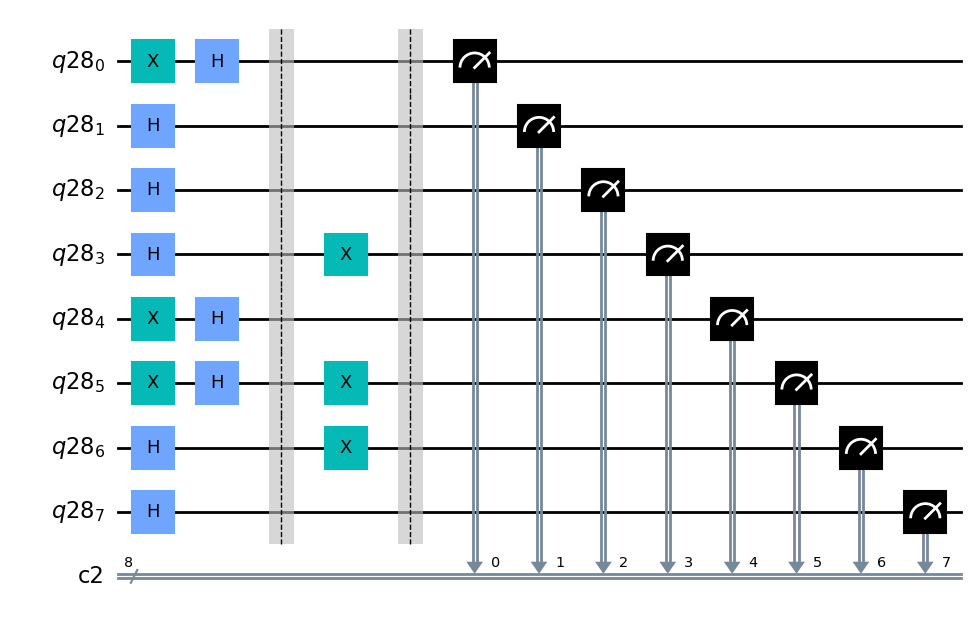

In [21]:
# Encryption (Using the h basis)

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# create a quantum curcuit for Asja's qubits.
# It's initially set to |0>.
qregE = QuantumRegister(8) # quantum register with 8 qubits
cregE = ClassicalRegister(8) # classical register with 8 bits
mycircuitE = QuantumCircuit(qregE,cregE) # quantum circuit with quantum and classical registers

# Enter your message as a list of numbers
message = [1,0,0,0,1,1,0,0]

# apply x-gate to change initial states from 0 to 1, preparing message "10001100"
for m in range(len(message)):
    if message[m]==1:
        mycircuitE.x(qregE[m])
        
# apply h-gate to change basis
mycircuitE.h(qregE)

# barrier for a better visualization
mycircuitE.barrier()

# create random key and apply x gates and encrypt message
key=[] 
for i in range(8):
    a=randrange(2)
    key.append(a)
    if a==1:
        mycircuitE.x(qregE[i])
        
mycircuitE.barrier()
mycircuitE.measure(qregE,cregE)
mycircuitE.draw(output='mpl')

In [22]:
# execute the circuit
job = execute(mycircuitE,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(mycircuitE)

# display the measurement results with total count
print("Encryption", encryption)
# this converts the measurement result string into a list
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
encrypted_message.reverse()
print()
print("Message:", message)
print("Key:", key)

Encryption {'00000010': 6, '11100111': 1, '11001110': 4, '00110101': 2, '00101011': 7, '00001100': 7, '10010010': 2, '00111101': 6, '00100011': 4, '00010100': 3, '11101000': 3, '10100000': 8, '00001001': 7, '10111001': 5, '01100101': 5, '00110011': 4, '00101101': 5, '11100001': 6, '11001100': 5, '01001001': 4, '00111100': 1, '00100100': 5, '11101010': 3, '11000011': 3, '10000100': 7, '01101011': 7, '01000000': 5, '01111110': 8, '11100011': 3, '11001010': 9, '01000110': 4, '01111100': 3, '10101001': 7, '00000000': 4, '11011111': 6, '11111000': 4, '10001111': 8, '10111011': 4, '01010111': 5, '01110101': 3, '10010111': 7, '11110110': 6, '00010011': 4, '01011011': 3, '10110111': 6, '00010101': 8, '11110000': 3, '10100001': 7, '00001000': 5, '11011010': 5, '00110000': 6, '01000001': 2, '01111101': 8, '11011001': 9, '01101000': 9, '01001010': 4, '01110100': 7, '11000000': 2, '11101011': 7, '11110111': 8, '10110010': 7, '10000000': 5, '01011111': 5, '10110011': 6, '00101100': 3, '00110100': 1

C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\1753846732.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(mycircuitE,Aer.get_backend('qasm_simulator'))


c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


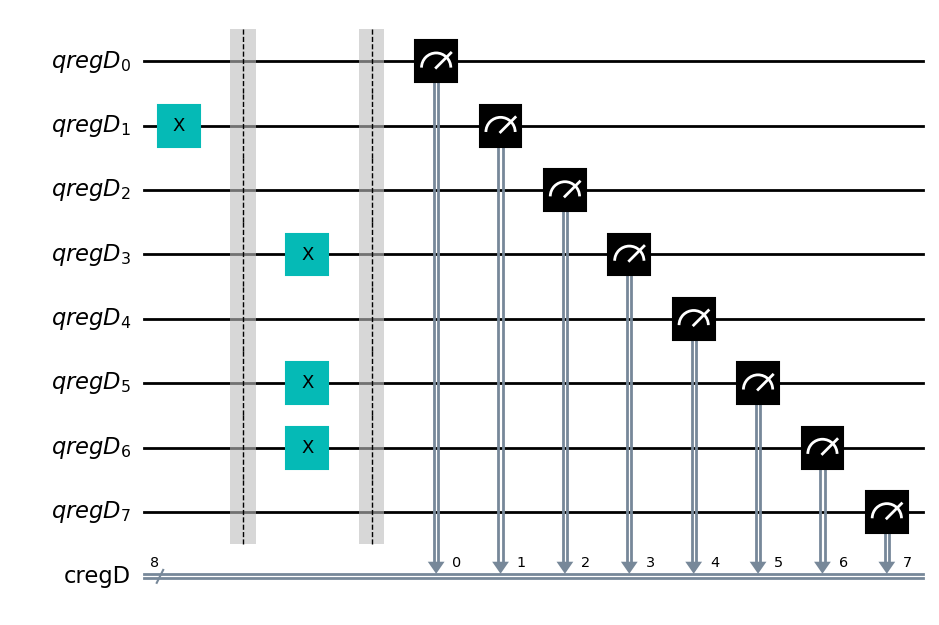

In [24]:
#Now let's create a quantum circuit to decrypt the message

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute_function

from random import randrange


#Now we have both the keys and the Encrypted message and we just have to
#use a decryption method to get the message


qregD = QuantumRegister(8, "qregD")
cregD = ClassicalRegister(8, "cregD")

mycircuitD = QuantumCircuit(qregD,cregD)

for m in range(len(encrypted_message)):
    if encrypted_message[m] == 1:
        mycircuitD.x(qregD[m])
mycircuitD.barrier()
#Now we reconstructed encrypted message now we have to use the randomly generated key to decrypt the message
        
for i in range(len(key)):
    if key[i]==1:
        mycircuitD.x(qregD[i])


mycircuitD.barrier()

#Doing the measurements
mycircuitD.measure(qregD,cregD)
mycircuitD.draw(output = 'mpl')


In [25]:
#Running the code and getting the results for the decrypted message at B
# execute the circuit
job = execute(mycircuitD,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(mycircuitD)

# display the measurement results with total count
print("Decryption", decryption)
# this converts the measurement result string into a list
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'01101010': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Decrypted Message: [0, 1, 0, 1, 0, 1, 1, 0]

Protocol is incorrect!


C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\82436783.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(mycircuitD,Aer.get_backend('qasm_simulator'))


In [ ]:
#Here we got incoorect value as Z gate is the bit flipper for Hadamard basis
#Using the following information

c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


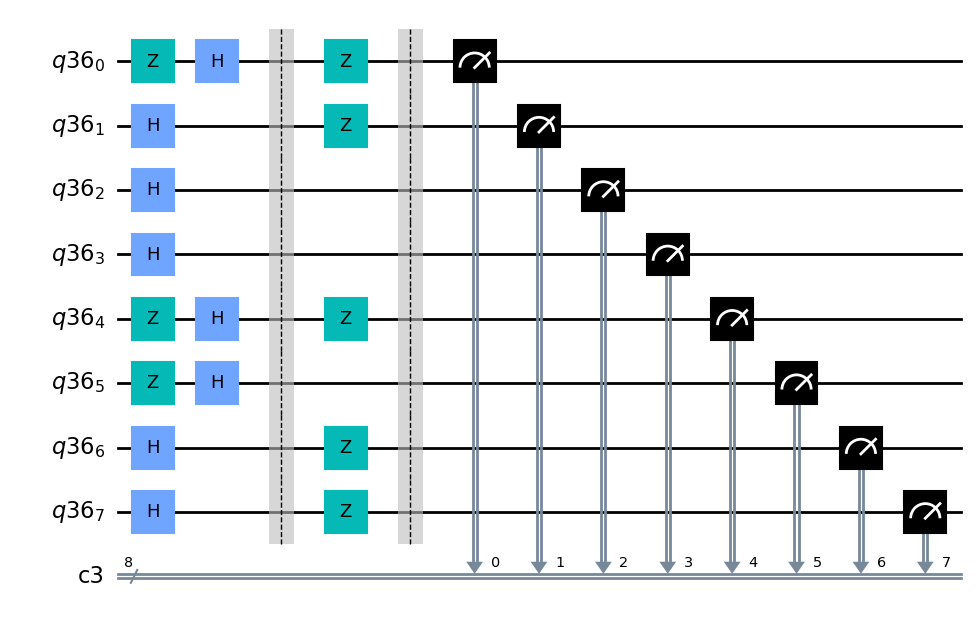

In [26]:
# Encryption (Using the h basis)

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# create a quantum curcuit for Asja's qubits.
# It's initially set to |0>.
qregE = QuantumRegister(8) # quantum register with 8 qubits
cregE = ClassicalRegister(8) # classical register with 8 bits
mycircuitE = QuantumCircuit(qregE,cregE) # quantum circuit with quantum and classical registers

# Enter your message as a list of numbers
message = [1,0,0,0,1,1,0,0]

# apply x-gate to change initial states from 0 to 1, preparing message "10001100"
for m in range(len(message)):
    if message[m]==1:
        mycircuitE.z(qregE[m])
        
# apply h-gate to change basis
mycircuitE.h(qregE)

# barrier for a better visualization
mycircuitE.barrier()

# create random key and apply x gates and encrypt message
key=[] 
for i in range(8):
    a=randrange(2)
    key.append(a)
    if a==1:
        mycircuitE.z(qregE[i])
        
mycircuitE.barrier()
mycircuitE.measure(qregE,cregE)
mycircuitE.draw(output='mpl')

In [27]:
# execute the circuit
job = execute(mycircuitE,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(mycircuitE)

# display the measurement results with total count
print("Encryption", encryption)
# this converts the measurement result string into a list
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
encrypted_message.reverse()
print()
print("Message:", message)
print("Key:", key)

Encryption {'10100111': 2, '10111111': 6, '01010011': 4, '00010101': 4, '01010101': 8, '00011001': 6, '01111100': 3, '01000110': 5, '10011010': 4, '11111110': 5, '10111001': 4, '01100001': 7, '00011101': 6, '11111010': 3, '10010100': 8, '10110011': 1, '01011111': 6, '00000100': 7, '00110011': 2, '00101101': 1, '11001100': 3, '11100001': 3, '11100011': 7, '11001010': 3, '00110001': 8, '00101111': 5, '01111110': 2, '01000000': 6, '00000110': 3, '11010010': 7, '10011011': 5, '00110100': 4, '00101100': 9, '11100110': 3, '11001101': 2, '10010011': 4, '00001011': 9, '11101011': 5, '11000000': 5, '00100111': 5, '01001010': 4, '01110100': 4, '10000100': 7, '10110110': 11, '01011100': 4, '01100010': 6, '01000001': 4, '01111101': 5, '00000111': 4, '00110000': 3, '01011011': 5, '10110111': 2, '11001111': 1, '11100100': 4, '10000110': 5, '01101000': 5, '00010010': 5, '11101100': 3, '11000001': 4, '00111010': 2, '00100110': 6, '10011001': 4, '11010101': 5, '00100011': 2, '00111101': 3, '00001100': 

C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\1753846732.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(mycircuitE,Aer.get_backend('qasm_simulator'))


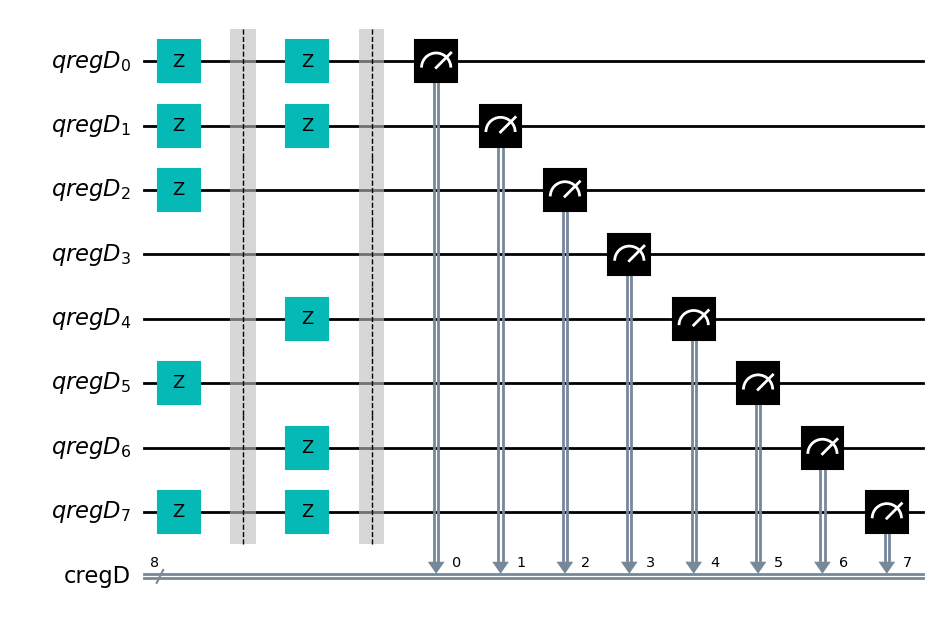

In [28]:
#Now let's create a quantum circuit to decrypt the message

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute_function

from random import randrange


#Now we have both the keys and the Encrypted message and we just have to
#use a decryption method to get the message


qregD = QuantumRegister(8, "qregD")
cregD = ClassicalRegister(8, "cregD")

mycircuitD = QuantumCircuit(qregD,cregD)

for m in range(len(encrypted_message)):
    if encrypted_message[m] == 1:
        mycircuitD.z(qregD[m])
mycircuitD.barrier()
#Now we reconstructed encrypted message now we have to use the randomly generated key to decrypt the message
        
for i in range(len(key)):
    if key[i]==1:
        mycircuitD.z(qregD[i])


mycircuitD.barrier()

#Doing the measurements
mycircuitD.measure(qregD,cregD)
mycircuitD.draw(output = 'mpl')


In [29]:
#Running the code and getting the results for the decrypted message at B
# execute the circuit
job = execute(mycircuitD,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(mycircuitD)

# display the measurement results with total count
print("Decryption", decryption)
# this converts the measurement result string into a list
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

# we reverse the list since the quantum simulator considers our MSB as LSB
decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'00000000': 1024}

Message: [1, 0, 0, 0, 1, 1, 0, 0]
Decrypted Message: [0, 0, 0, 0, 0, 0, 0, 0]

Protocol is incorrect!


C:\Users\jrnat\AppData\Local\Temp\ipykernel_20496\82436783.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(mycircuitD,Aer.get_backend('qasm_simulator'))
